<a href="https://colab.research.google.com/github/nitishm08/Bank-Notes-Prediction/blob/master/Bank_Notes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('/content/drive/My Drive/Python for Data Science/22-Deep Learning/bank_note_data.csv')

In [4]:
df.head(2)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


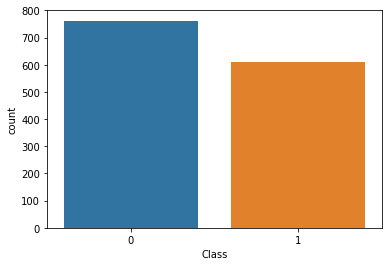

In [7]:
sns.countplot(df['Class'])

In [8]:
df.corr()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
Image.Var,1.000000,0.264026,-0.380850,0.276817,-0.724843
Image.Skew,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Image.Curt,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


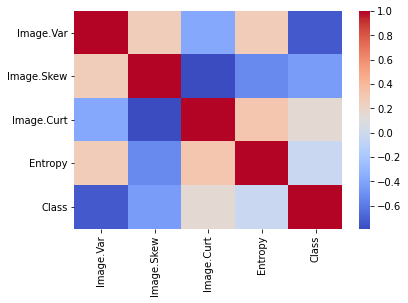

In [11]:
sns.heatmap(df.corr(),cmap='coolwarm')

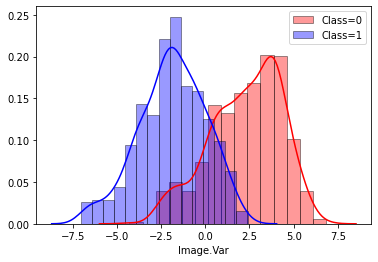

In [32]:
sns.distplot(df[df['Class']==0]['Image.Var'],bins=15,hist_kws=dict(edgecolor='black'),color='red',label='Class=0')
sns.distplot(df[df['Class']==1]['Image.Var'],bins=15,hist_kws=dict(edgecolor='black'),color='blue',label='Class=1')
plt.legend()

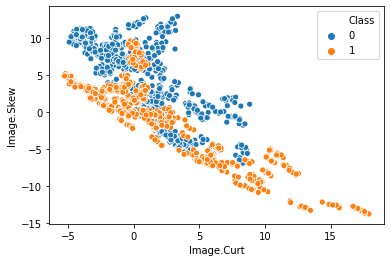

In [34]:
sns.scatterplot(x='Image.Curt',y='Image.Skew',data=df,hue='Class')

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X=df.drop('Class',axis=1).values
y=df['Class'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
from xgboost import XGBRFClassifier

In [47]:
classifier=XGBRFClassifier()

In [48]:
classifier.fit(X_train,y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='binary:logistic',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [49]:
prediction=classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
print(confusion_matrix(y_test,prediction))

[[227  11]
 [ 10 164]]


In [52]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       238
           1       0.94      0.94      0.94       174

    accuracy                           0.95       412
   macro avg       0.95      0.95      0.95       412
weighted avg       0.95      0.95      0.95       412



In [55]:
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [58]:
X.shape

(1372, 4)

In [117]:
model=Sequential()

model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [118]:
from keras.callbacks import EarlyStopping

In [119]:
early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1,mode='min')

In [120]:
X=df.drop('Class',axis=1).values
y=df['Class'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler=MinMaxScaler()

In [123]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [124]:
model.fit(X_train,y_train,epochs=400,callbacks=[early_stop],validation_data=(X_test,y_test))

Train on 960 samples, validate on 412 samples
Epoch 1/400
960/960 [==============================] - 0s 198us/step - loss: 0.6734 - val_loss: 0.6388
Epoch 2/400
960/960 [==============================] - 0s 50us/step - loss: 0.6607 - val_loss: 0.6221
Epoch 3/400
960/960 [==============================] - 0s 54us/step - loss: 0.6492 - val_loss: 0.6065
Epoch 4/400
960/960 [==============================] - 0s 48us/step - loss: 0.6212 - val_loss: 0.5836
Epoch 5/400
960/960 [==============================] - 0s 48us/step - loss: 0.5987 - val_loss: 0.5588
Epoch 6/400
960/960 [==============================] - 0s 50us/step - loss: 0.5757 - val_loss: 0.5341
Epoch 7/400
960/960 [==============================] - 0s 51us/step - loss: 0.5619 - val_loss: 0.5080
Epoch 8/400
960/960 [==============================] - 0s 54us/step - loss: 0.5554 - val_loss: 0.4839
Epoch 9/400
960/960 [==============================] - 0s 52us/step - loss: 0.5380 - val_loss: 0.4619
Epoch 10/400
960/960 [=============

In [125]:
model_loss=pd.DataFrame(model.history.history)

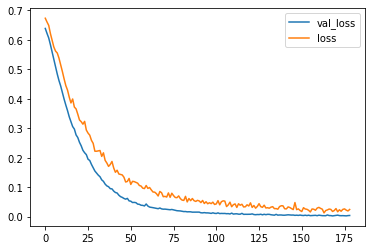

In [126]:
model_loss.plot()

In [127]:
prediction=model.predict_classes(X_test)

In [128]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[238   0]
 [  0 174]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [131]:
#XGBOOST accuracy and standard deviation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.42 %
Standard Deviation: 1.69 %


In [149]:
df[df['Class']==1].head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
762,-1.39710,3.31910,-1.392700,-1.99480,1
763,0.39012,-0.14279,-0.031994,0.35084,1
764,-1.66770,-7.15350,7.892900,0.96765,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
766,-3.56810,-8.21300,10.083000,0.96765,1


In [150]:
#Finding individual predictions
find_prediction=np.array([3.45660,9.5228,-4.0112,-3.59440])
find_prediction2=np.array([-3.56810,-8.213,10.08300,0.97])

In [153]:
model.predict_classes(scaler.transform(find_prediction.reshape(-1,4)))


array([[0]], dtype=int32)

In [152]:
model.predict_classes(scaler.transform(find_prediction2.reshape(-1,4)))

array([[1]], dtype=int32)